# 정보 이론 핵심 개념 (Core Concepts of Information Theory)

### 개요
정보 이론(Information Theory)은 불확실성을 정량화하고 정보의 전송, 처리, 저장을 다루는 학문임. 이 노트북에서는 정보 이론의 기초가 되는 핵심 개념들을 단계적으로 살펴봄. 각 개념은 이전 개념을 바탕으로 구축되므로, 순서대로 학습하는 것이 중요함.

**학습할 개념 목록:**
1.  **정보량 (Information Content)**: 특정 사건이 주는 놀라움의 정도
2.  **엔트로피 (Entropy)**: 확률 변수의 평균적인 불확실성
3.  **결합 & 조건부 엔트로피 (Joint & Conditional Entropy)**: 다수 변수 간의 불확실성 관계
4.  **상호 정보 (Mutual Information)**: 두 변수가 공유하는 정보의 양
5.  **쿨백-라이블러 발산 (KL Divergence)**: 두 확률 분포의 차이
6.  **교차 엔트로피 (Cross-Entropy)**: 분류 모델의 손실 함수로 사용되는 분포 간 차이 측정

In [9]:
# !pip install numpy
# !pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

## 1. 정보량 (Information Content)
정보량(또는 섀넌 정보량)은 어떤 사건이 발생했을 때 얻는 정보의 양을 의미함. 발생 확률이 낮은 사건일수록 정보량은 커짐 (더 '놀라운' 사건). 확률이 $p(x)$인 사건 $x$의 정보량 $I(x)$는 다음과 같이 정의됨.

$$ I(x) = -\log_2(p(x)) $$

단위는 비트(bit)를 사용하며, 이는 로그의 밑을 2로 사용하기 때문임.

In [10]:
def information_content(p):
    # p는 0과 1 사이의 확률 값
    # p=0인 경우를 대비해 작은 값(epsilon)을 더함
    epsilon = 1e-9
    return -np.log2(p + epsilon)

# 예시: 주사위 던지기
p_common = 5/6  # 흔한 사건 (1~5가 나올 확률)
p_rare = 1/6    # 희귀한 사건 (6이 나올 확률)

info_common = information_content(p_common)
info_rare = information_content(p_rare)

print(f"흔한 사건 (p={p_common:.2f})의 정보량: {info_common:.4f} bits")
print(f"희귀한 사건 (p={p_rare:.2f})의 정보량: {info_rare:.4f} bits")

흔한 사건 (p=0.83)의 정보량: 0.2630 bits
희귀한 사건 (p=0.17)의 정보량: 2.5850 bits


## 2. 엔트로피 (Entropy)
엔트로피 $H(X)$는 확률 변수 $X$가 가질 수 있는 모든 사건에 대한 정보량의 기댓값(평균)임. 이는 해당 확률 변수의 **전반적인 불확실성**을 측정하는 척도임.

$$ H(X) = E[I(X)] = -\sum_{x \in X} p(x) \log_2(p(x)) $$

### 엔트로피의 성질
- <b>비음성(Non-negativity)</b>: 엔트로피는 항상 0 이상임 ($H(X) \ge 0$).
- <b>최대 엔트로피(Maximum Entropy)</b>: 모든 사건의 확률이 동일할 때(균등 분포) 엔트로피는 최댓값을 가짐. 즉, 가장 예측하기 어려울 때 불확실성이 최대가 됨.

### 바이너리 엔트로피 (Binary Entropy)
결과가 두 개인 경우(예: 동전 던지기)의 엔트로피. 한 사건의 확률을 $p$라 하면 다른 사건의 확률은 $1-p$가 되며, 엔트로피는 다음과 같음.

$$ H_b(p) = -p \log_2(p) - (1-p) \log_2(1-p) $$

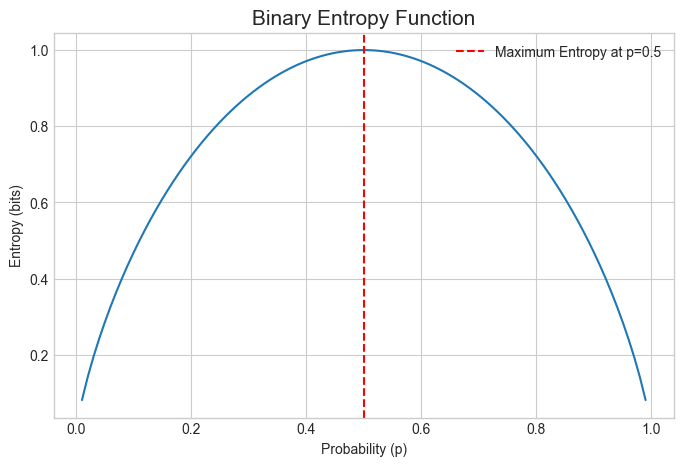

앞/뒤 확률이 0.5로 동일할 때의 엔트로피 (최댓값): 1.0000 bits


In [11]:
# 바이너리 엔트로피 함수
def binary_entropy(p):
    epsilon = 1e-9
    return -p * np.log2(p + epsilon) - (1-p) * np.log2(1-p + epsilon)

# p값의 범위에 따른 바이너리 엔트로피 시각화
p_range = np.linspace(0.01, 0.99, 100)
entropies = [binary_entropy(p) for p in p_range]

plt.figure(figsize=(8, 5))
plt.plot(p_range, entropies)
plt.title('Binary Entropy Function', fontsize=15)
plt.xlabel('Probability (p)')
plt.ylabel('Entropy (bits)')
plt.axvline(0.5, color='r', linestyle='--', label='Maximum Entropy at p=0.5')
plt.legend()
plt.show()

# p=0.5일 때 최대 엔트로피 값 확인
max_entropy_val = binary_entropy(0.5)
print(f"앞/뒤 확률이 0.5로 동일할 때의 엔트로피 (최댓값): {max_entropy_val:.4f} bits")

## 3. 결합 & 조건부 엔트로피 (Joint & Conditional Entropy)
두 개 이상의 확률 변수를 다룰 때 사용되는 개념.

- **결합 확률 분포 (Joint Probability Distribution)** $p(x, y)$: 사건 $X=x$와 $Y=y$가 동시에 발생할 확률.
- **결합 엔트로피 (Joint Entropy)** $H(X, Y)$: 결합 확률 분포의 엔트로피로, 두 변수 $X, Y$ 쌍의 불확실성을 측정함.
  $$ H(X, Y) = -\sum_{x,y} p(x, y) \log_2 p(x, y) $$
- **조건부 확률 (Conditional Probability)** $p(y|x)$: 사건 $X=x$가 주어졌을 때, 사건 $Y=y$가 발생할 확률.
- **조건부 엔트로피 (Conditional Entropy)** $H(Y|X)$: $X$의 값을 알았을 때, $Y$에 대해 여전히 남아있는 불확실성의 양. 
  $$ H(Y|X) = H(X, Y) - H(X) $$

In [12]:
# 예제: 날씨(X)와 아이스크림 판매량(Y)의 결합 확률 분포
# X: {맑음, 흐림}, Y: {낮음, 높음}
p_xy = np.array([
    [0.1, 0.4],  # P(맑음, 낮음), P(맑음, 높음)
    [0.3, 0.2]   # P(흐림, 낮음), P(흐림, 높음)
])

def entropy(p):
    epsilon = 1e-9
    return -np.sum(p * np.log2(p + epsilon))

# 각 확률 변수의 주변 확률 분포 계산
p_x = np.sum(p_xy, axis=1) # [P(맑음), P(흐림)]
p_y = np.sum(p_xy, axis=0) # [P(낮음), P(높음)]
print(f"주변 확률 분포 P(X): {p_x}")
print(f"주변 확률 분포 P(Y): {p_y}")

# 각 엔트로피 계산
h_x = entropy(p_x)
h_y = entropy(p_y)
h_xy = entropy(p_xy.flatten()) # 결합 엔트로피
h_y_given_x = h_xy - h_x # 조건부 엔트로피 H(Y|X)
h_x_given_y = h_xy - h_y # 조건부 엔트로피 H(X|Y)

print(f"결합 확률 분포 p(x,y):\n{p_xy}")
print(f"H(X): {h_x:.4f}")
print(f"H(Y): {h_y:.4f}")
print(f"결합 엔트로피 H(X,Y): {h_xy:.4f}")
print(f"조건부 엔트로피 H(Y|X) = H(X,Y) - H(X): {h_y_given_x:.4f}")
print(f"조건부 엔트로피 H(X|Y) = H(X,Y) - H(Y): {h_x_given_y:.4f}")

주변 확률 분포 P(X): [0.5 0.5]
주변 확률 분포 P(Y): [0.4 0.6]
결합 확률 분포 p(x,y):
[[0.1 0.4]
 [0.3 0.2]]
H(X): 1.0000
H(Y): 0.9710
결합 엔트로피 H(X,Y): 1.8464
조건부 엔트로피 H(Y|X) = H(X,Y) - H(X): 0.8464
조건부 엔트로피 H(X|Y) = H(X,Y) - H(Y): 0.8755


## 4. 상호 정보 (Mutual Information)
상호 정보 $I(X;Y)$는 한 확률 변수를 앎으로써 다른 확률 변수에 대한 불확실성이 **얼마나 감소하는지**를 측정함. 두 변수가 공유하는 정보의 양을 나타냄.

$$ I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X) = H(X) + H(Y) - H(X,Y) $$

두 변수가 독립이면 상호 정보는 0임.

In [13]:
# 상호 정보 계산 (위에서 계산한 엔트로피 값들 사용)
mutual_info = h_x + h_y - h_xy

print(f"상호 정보 I(X;Y) = H(X) + H(Y) - H(X,Y): {mutual_info:.4f}")
print("I(X;Y) > 0 이므로, 날씨와 아이스크림 판매량은 서로 독립이 아님을 알 수 있음.")

상호 정보 I(X;Y) = H(X) + H(Y) - H(X,Y): 0.1245
I(X;Y) > 0 이므로, 날씨와 아이스크림 판매량은 서로 독립이 아님을 알 수 있음.


## 5. 쿨백-라이블러 발산 (KL Divergence)
KL 발산 $D_{KL}(p||q)$은 두 확률 분포 $p$와 $q$의 차이를 측정함. 실제 분포 $p$를 모델 예측 분포 $q$로 근사할 때 발생하는 **정보량의 손실**을 의미함.

$$ D_{KL}(p||q) = \sum_{x} p(x) \log_2 \left( \frac{p(x)}{q(x)} \right) $$

- <b>비대칭성(Asymmetric)</b>: $D_{KL}(p||q) \neq D_{KL}(q||p)$ 이므로 '거리' 개념은 아님.
- <b>비음성(Non-negativity)</b>: 항상 0보다 크거나 같으며($D_{KL}(p||q) \ge 0$), 두 분포가 동일할 때만 0이 됨.

In [14]:
def kl_divergence(p, q):
    epsilon = 1e-9
    return np.sum(p * np.log2((p + epsilon) / (q + epsilon)))

# 실제 분포 p와 두 개의 근사 분포 q1, q2
p = np.array([0.1, 0.2, 0.7])
q1 = np.array([0.15, 0.25, 0.6]) # p와 유사한 분포
q2 = np.array([0.8, 0.1, 0.1]) # p와 매우 다른 분포

kl_pq1 = kl_divergence(p, q1)
kl_pq2 = kl_divergence(p, q2)
kl_q1p = kl_divergence(q1, p) # 비대칭성 확인

print(f"p = {p}")
print(f"q1 = {q1} (p와 유사)")
print(f"q2 = {q2} (p와 상이)\n")
print(f"KL(p || q1): {kl_pq1:.4f} (작은 차이)")
print(f"KL(p || q2): {kl_pq2:.4f} (큰 차이)")
print(f"KL(q1 || p): {kl_q1p:.4f} (KL(p||q1)과 다른 값, 비대칭성 확인)")

p = [0.1 0.2 0.7]
q1 = [0.15 0.25 0.6 ] (p와 유사)
q2 = [0.8 0.1 0.1] (p와 상이)

KL(p || q1): 0.0328 (작은 차이)
KL(p || q2): 1.8651 (큰 차이)
KL(q1 || p): 0.0348 (KL(p||q1)과 다른 값, 비대칭성 확인)


## 6. 교차 엔트로피 (Cross-Entropy)
교차 엔트로피 $H(p,q)$도 KL 발산처럼 두 확률 분포 $p$와 $q$의 차이를 측정하지만, 주로 머신러닝 **분류 문제의 손실 함수(Loss Function)**로 사용됨.

$$ H(p, q) = -\sum_{x} p(x) \log_2 q(x) $$

KL 발산과 교차 엔트로피는 다음과 같은 관계를 가짐:
$$ H(p,q) = H(p) + D_{KL}(p||q) $$

학습 과정에서 실제 분포 $p$의 엔트로피 $H(p)$는 상수이므로, **교차 엔트로피를 최소화하는 것은 KL 발산을 최소화하는 것과 동일함.**

In [15]:
def cross_entropy(p, q):
    epsilon = 1e-9
    return -np.sum(p * np.log2(q + epsilon))

# 위에서 사용한 p, q1, q2 사용
ce_pq1 = cross_entropy(p, q1)
ce_pq2 = cross_entropy(p, q2)

# 관계식 H(p,q) = H(p) + D_KL(p||q) 확인
h_p = entropy(p)

print(f"Cross-Entropy(p, q1): {ce_pq1:.4f}")
print(f"H(p) + KL(p || q1): {h_p + kl_pq1:.4f} (거의 동일)\n")

print(f"Cross-Entropy(p, q2): {ce_pq2:.4f}")
print(f"H(p) + KL(p || q2): {h_p + kl_pq2:.4f} (거의 동일)\n")

print("분류 모델은 손실 값인 교차 엔트로피를 최소화하도록 학습함.")
print(f"따라서 모델의 예측 분포는 q2보다 q1에 가까워지도록 업데이트될 것임.")

Cross-Entropy(p, q1): 1.1896
H(p) + KL(p || q1): 1.1896 (거의 동일)

Cross-Entropy(p, q2): 3.0219
H(p) + KL(p || q2): 3.0219 (거의 동일)

분류 모델은 손실 값인 교차 엔트로피를 최소화하도록 학습함.
따라서 모델의 예측 분포는 q2보다 q1에 가까워지도록 업데이트될 것임.


### 최종 요약
이 노트북에서는 정보 이론의 기본 개념들을 순차적으로 살펴보았음. 개별 사건의 놀라움을 나타내는 **정보량**에서 시작하여, 확률 변수 전체의 불확실성을 나타내는 **엔트로피**로 확장함. 둘 이상의 변수 간 관계는 **결합/조건부 엔트로피**와 **상호 정보**를 통해 분석했으며, 두 확률 분포의 차이를 측정하는 방법으로 **KL 발산**과 **교차 엔트로피**를 학습함. 이 개념들은 데이터 압축, 통신 이론뿐만 아니라 머신러닝 모델의 학습 원리를 이해하는 데 필수적임.